# Housing Price Prediction - Advanced Regression Model Assignment

# Problem Statement

Surprise Housing has decided to enter the Australian market. They want to know actual prices of houses, buy which are undervalued and flip them for profit. They want to know:
1. Actual value of each property and which variables are significant in predicting the price of a house.
2. How well those variables describe the price of a house.
3. Whether to invest in a property or not.

# 1. Data Understanding, Preparation and EDA

## 1.1 Data Understanding and Preparation

In [385]:
# Importing necessary libs
#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Remove unnecessary warnings
#
import warnings
warnings.filterwarnings('ignore')

In [386]:
# Read the data
#
pd.set_option('display.max_columns', None)
housing_df = pd.read_csv('train.csv')
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 1.1.1 Data Inspection

In [387]:
housing_df.shape # Consists of 1460 rows and 81 columns

(1460, 81)

In [388]:
# List unique values
#
housing_df.nunique().sort_values(ascending = False)

Id               1460
LotArea          1073
GrLivArea         861
BsmtUnfSF         780
1stFlrSF          753
TotalBsmtSF       721
SalePrice         663
BsmtFinSF1        637
GarageArea        441
2ndFlrSF          417
MasVnrArea        327
WoodDeckSF        274
OpenPorchSF       202
BsmtFinSF2        144
EnclosedPorch     120
YearBuilt         112
LotFrontage       110
GarageYrBlt        97
ScreenPorch        76
YearRemodAdd       61
Neighborhood       25
LowQualFinSF       24
MiscVal            21
3SsnPorch          20
Exterior2nd        16
MSSubClass         15
Exterior1st        15
TotRmsAbvGrd       12
MoSold             12
OverallQual        10
Condition1          9
OverallCond         9
SaleType            9
PoolArea            8
RoofMatl            8
HouseStyle          8
BedroomAbvGr        8
Condition2          8
Functional          7
GarageType          6
SaleCondition       6
Heating             6
BsmtFinType2        6
BsmtFinType1        6
RoofStyle           6
Foundation

In [389]:
housing_df.info() # shows the data type of each column with number of null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**NOTE**: There are null values in many columns, so data imputation would be required.

### 1.1.2 Data Imputation (Fix Missing Values)

We will list all columns with percentage of missing values and do the respective operations based on the column type:
- **If column is categorical**: Based on the data dictionary, if missing value implies 'unavilability' or 'absence of feature', we will replace the missing values with string `NA` signifying `absence of feature` and not be counted as missing value.
- **If column is numerical with over 20% missing values**: Drop that column.
- **If column is numerical with less than 20% missing values**: Based on data dictionary explanation of that column, either drop the rows with missing values, or imputate with median.

In [390]:
# Helpful functions for imputation

def fill_missing_vals_with_median(col):
    print("Before:", str(100 * housing_df[col].isnull().mean()))
    
    median = housing_df[col].median()
    print("Median:", str(median))
    housing_df[col] = housing_df[col].fillna(median)
    
    print("After:", str(100 * housing_df[col].isnull().mean()))
    
def fill_missing_vals_with_string_na(col):
    print("Before:", housing_df[col].unique())
    housing_df[col] = housing_df[col].fillna('NA')
    print("After:", housing_df[col].unique())

In [391]:
# Show all rows without cropping
pd.set_option('display.max_rows', None)

# List percentage of missing values for each column (highest to lowest)
#
(100 * housing_df.isnull().mean()).sort_values(ascending = False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
MasVnrType       59.726027
FireplaceQu      47.260274
LotFrontage      17.739726
GarageYrBlt       5.547945
GarageCond        5.547945
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
Electrical        0.068493
Id                0.000000
Functional        0.000000
Fireplaces        0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
TotRmsAbvGrd      0.000000
GarageCars        0.000000
GrLivArea         0.000000
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
S

We have to work with following columns. We will go over each column, determine its type and significance based on value counts and type and do necessary imputation as described above.
```
PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
MasVnrType       59.726027
FireplaceQu      47.260274
LotFrontage      17.739726
GarageYrBlt       5.547945
GarageCond        5.547945
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
Electrical        0.068493
```

`PoolQC`

In [392]:
# Pool Qualitiy (Categorical variable) signifies presence of the Pool.
# So missing values can be assumed as absence of pool. So imputate with 'NA' meaning no pool.
#
fill_missing_vals_with_string_na('PoolQC')

Before: [nan 'Ex' 'Fa' 'Gd']
After: ['NA' 'Ex' 'Fa' 'Gd']


`MiscFeature`

In [393]:
# Miscellaneous (Categorical variable) describes various extra features availabe. Absence means absence of feature.
# So imputate misssing values with 'NA'.
#
fill_missing_vals_with_string_na('MiscFeature')

Before: [nan 'Shed' 'Gar2' 'Othr' 'TenC']
After: ['NA' 'Shed' 'Gar2' 'Othr' 'TenC']


`Alley`

In [394]:
# Alley (Categorical variable) - imputate misssing values with 'NA' meaning no Alley available.
#
fill_missing_vals_with_string_na('Alley')

Before: [nan 'Grvl' 'Pave']
After: ['NA' 'Grvl' 'Pave']


`Fence`

In [395]:
# Fence (Categorical variable) - imputate misssing values with 'NA' meaning no fence available.
#
fill_missing_vals_with_string_na('Fence')

Before: [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
After: ['NA' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


`MasVnrType`

In [396]:
# MasVnrType (Categorical variable) - imputate misssing values with 'NA' meaning not available.
#
fill_missing_vals_with_string_na('MasVnrType')

Before: ['BrkFace' nan 'Stone' 'BrkCmn']
After: ['BrkFace' 'NA' 'Stone' 'BrkCmn']


`FireplaceQu`

In [397]:
# FireplaceQu (Categorical variable) - imputate misssing values with 'NA' meaning not available.
#
fill_missing_vals_with_string_na('FireplaceQu')

Before: [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
After: ['NA' 'TA' 'Gd' 'Fa' 'Ex' 'Po']


`LotFrontage`

In [398]:
# LotFrontage (Numerical variable) with 17.74 % missing values. Imputate with median
#
fill_missing_vals_with_median('LotFrontage')

Before: 17.73972602739726
Median: 69.0
After: 0.0


`GarageYrBlt`

In [399]:
# GarageYrBlt (Numerical variable) with 5.55 % missing values. Imputate with median
#
fill_missing_vals_with_median('GarageYrBlt')

Before: 5.5479452054794525
Median: 1980.0
After: 0.0


`GarageCond`

In [400]:
# GarageCond (Categorical variable) - imputate misssing values with 'NA' meaning not available.
#
fill_missing_vals_with_string_na('GarageCond')

Before: ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
After: ['TA' 'Fa' 'NA' 'Gd' 'Po' 'Ex']


`GarageType`

In [401]:
# GarageType (Categorical variable) - imputate misssing values with 'NA' meaning not available.
#
fill_missing_vals_with_string_na('GarageType')

Before: ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
After: ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'NA' 'Basment' '2Types']


`GarageFinish`

In [402]:
# GarageFinish (Categorical variable) - imputate misssing values with 'NA' meaning not available.
#
fill_missing_vals_with_string_na('GarageFinish')

Before: ['RFn' 'Unf' 'Fin' nan]
After: ['RFn' 'Unf' 'Fin' 'NA']


`GarageQual`

In [403]:
# GarageQual (Categorical variable) - imputate misssing values with 'NA' meaning not available.
#
fill_missing_vals_with_string_na('GarageQual')

Before: ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
After: ['TA' 'Fa' 'Gd' 'NA' 'Ex' 'Po']


`BsmtFinType2`

In [404]:
# BsmtFinType2 (Categorical variable) - imputate misssing values with 'NA' meaning not available.
#
fill_missing_vals_with_string_na('BsmtFinType2')

Before: ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
After: ['Unf' 'BLQ' 'NA' 'ALQ' 'Rec' 'LwQ' 'GLQ']


`BsmtExposure`

In [405]:
# BsmtExposure (Categorical variable) - imputate misssing values with 'NA' meaning not available.
#
fill_missing_vals_with_string_na('BsmtExposure')

Before: ['No' 'Gd' 'Mn' 'Av' nan]
After: ['No' 'Gd' 'Mn' 'Av' 'NA']


`BsmtQual`

In [406]:
# BsmtQual (Categorical variable) - imputate misssing values with 'NA' meaning not available.
#
fill_missing_vals_with_string_na('BsmtQual')

Before: ['Gd' 'TA' 'Ex' nan 'Fa']
After: ['Gd' 'TA' 'Ex' 'NA' 'Fa']


`BsmtCond`

In [407]:
# BsmtCond (Categorical variable) - imputate misssing values with 'NA' meaning not available.
#
fill_missing_vals_with_string_na('BsmtCond')

Before: ['TA' 'Gd' nan 'Fa' 'Po']
After: ['TA' 'Gd' 'NA' 'Fa' 'Po']


`BsmtFinType1`

In [408]:
# BsmtFinType1 (Categorical variable) - imputate misssing values with 'NA' meaning not available.
#
fill_missing_vals_with_string_na('BsmtFinType1')

Before: ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
After: ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'NA' 'LwQ']


`Electrical`

In [409]:
# Electrical (Categorical variable) - imputate misssing values with 'NA' meaning not available.
#
fill_missing_vals_with_string_na('Electrical')

Before: ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
After: ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' 'NA']


`MasVnrArea`

In [410]:
# MasVnrArea (Numerical variable) with 0.55% missing values. Imputate with median
#
fill_missing_vals_with_median('MasVnrArea')

Before: 0.547945205479452
Median: 0.0
After: 0.0


In [411]:
# Recheck percentages of missing values
#
(100 * housing_df.isnull().mean()).sort_values(ascending = False)

Id               0.0
CentralAir       0.0
GarageYrBlt      0.0
GarageType       0.0
FireplaceQu      0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
HalfBath         0.0
FullBath         0.0
BsmtHalfBath     0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
PoolQC           0.0
SaleCondition    0.0
SaleType         0.0
YrSold           0.0
MoSold           0.0
MiscVal          0.0
MiscFeature      0.0
Fence            0.0
PoolArea         0.0
GarageQual       0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
PavedDrive       0.0
GarageCond       0.0
Electrical       0.0
HeatingQC        0.0
MSSubClass       0.0
Heating          0.0
OverallCond      0.0
OverallQual      0.0
HouseStyle       0.0
BldgType         0.0
Condition2   

All missing values have been addressed.

### 1.1.3 Data Redunduncy (Remove evident duplicate data)

`GarageQual` and `GarageCond` seem to be duplicates. Lets check unique value counts and verify.

In [412]:
print(housing_df['GarageCond'].value_counts())
print(housing_df['GarageQual'].value_counts())

GarageCond
TA    1326
NA      81
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64
GarageQual
TA    1311
NA      81
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64


They seem to be quite the same, but we will confirm high correlation between the two variables and remove them during EDA step.

`Id` column is just an indentification number and not really a variable. It can be dropped.

In [413]:
housing_df.drop('Id', inplace = True, axis = 1)

### 1.1.4 Data Conversion (Convert seemgly Numerical cols to Categorical)

Numerical columns with less than 20-30 unique values, and depending on business usecase, can be converted to categorical columns.
Following are the Numerical columns with less than 20 unique values. We will convert them to categorical based on their definition in the data dictionary.
```
MSSubClass         15
TotRmsAbvGrd       12
MoSold             12
OverallQual        10
OverallCond         9
BedroomAbvGr        8
YrSold              5
GarageCars          5
KitchenAbvGr        4
BsmtFullBath        4
Fireplaces          4
FullBath            4
BsmtHalfBath        3
HalfBath            3
```

In [414]:
# Helpful function to convert numerical to categorical
#
def convert_numerical_to_categorical_variable(col):
    print("Before: ", housing_df[col].dtype)
    housing_df[col] = housing_df[col].astype('category')
    print("After: ", housing_df[col].dtype)

`MSSubClass`

In [415]:
# MSSubClass is a variable with 15 different types. 
# It is listed as Numerical variable and can be converted to Categorical variable.
# But we won't be converting the values to their string parts, since the strings are very long,
# And it will be unlegible to read them during analysis in graphs.
#
# housing_df['MSSubClass'].replace({
#     20: "1-STORY 1946 & NEWER ALL STYLES",
#     30: "1-STORY 1945 & OLDER",
#     40: "1-STORY W/FINISHED ATTIC ALL AGES",
#     45: "1-1/2 STORY - UNFINISHED ALL AGES",
#     50: "1-1/2 STORY FINISHED ALL AGES",
#     60: "2-STORY 1946 & NEWER",
#     70: "2-STORY 1945 & OLDER",
#     75: "2-1/2 STORY ALL AGES",
#     80: "SPLIT OR MULTI-LEVEL",
#     85: "SPLIT FOYER",
#     90: "DUPLEX - ALL STYLES AND AGES",
#     120: "1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
#     150: "1-1/2 STORY PUD - ALL AGES",
#     160: "2-STORY PUD - 1946 & NEWER",
#     180: "PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
#     190: "2 FAMILY CONVERSION - ALL STYLES AND AGES"
# }, inplace = True)
convert_numerical_to_categorical_variable('MSSubClass')

Before:  int64
After:  category


`TotRmsAbvGrd`

In [416]:
convert_numerical_to_categorical_variable('TotRmsAbvGrd')

Before:  int64
After:  category


`MoSold`

In [417]:
# This can be converted to month names.
#
housing_df['MoSold'].replace({ 
    1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun',
    7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec' 
}, inplace = True)

housing_df['MoSold'].head()

0    feb
1    may
2    sep
3    feb
4    dec
Name: MoSold, dtype: object

`OverallQual`

In [418]:
convert_numerical_to_categorical_variable('OverallQual')

Before:  int64
After:  category


`OverallCond`

In [419]:
convert_numerical_to_categorical_variable('OverallCond')

Before:  int64
After:  category


`BedroomAbvGr`

In [420]:
convert_numerical_to_categorical_variable('BedroomAbvGr')

Before:  int64
After:  category


`YrSold`

In [421]:
print("Before: ", housing_df['YrSold'].dtype)
housing_df['YrSold'] = housing_df['YrSold'].astype('category')
print("After: ", housing_df['YrSold'].dtype)

Before:  int64
After:  category


```
YrSold
GarageCars
KitchenAbvGr
BsmtFullBath
Fireplaces
FullBath
BsmtHalfBath
HalfBath
```
Converting all to categorical.

In [422]:
cols = ['YrSold', 'GarageCars', 'KitchenAbvGr', 'BsmtFullBath', 'Fireplaces', 'FullBath', 'BsmtHalfBath', 'HalfBath']

for col in cols:
    convert_numerical_to_categorical_variable(col)

Before:  category
After:  category
Before:  int64
After:  category
Before:  int64
After:  category
Before:  int64
After:  category
Before:  int64
After:  category
Before:  int64
After:  category
Before:  int64
After:  category
Before:  int64
After:  category


In [423]:
# Verify df
#
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,feb,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NA,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,may,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,sep,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NA,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,feb,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,dec,2008,WD,Normal,250000



### 1.1.5 Data Segregation - Numerical and Categorical

In [424]:
numerical_cols = housing_df.select_dtypes(exclude = ['category', 'object']).columns.values.tolist()
categorical_cols = housing_df.select_dtypes(include = ['category', 'object']).columns.values.tolist()

print("----- Numerical -----")
print(numerical_cols)
print(len(numerical_cols))
print("\n")
print("----- Categorical -----")
print(categorical_cols)
print(len(categorical_cols))

----- Numerical -----
['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']
23


----- Categorical -----
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFin

### 1.1.6 Data Skewness

We will check each Categorical variable for unique value counts and remove those with over 90% skewness towards one value. Since such data can as well be considered of having only one value and that would mean it would not add any meaningful insights.

In [425]:
for col in categorical_cols:
    print((housing_df[col].value_counts(normalize = True) * 100).round(2))
    print("----------------\n")

MSSubClass
20     36.71
60     20.48
50      9.86
120     5.96
30      4.73
160     4.32
70      4.11
80      3.97
90      3.56
190     2.05
85      1.37
75      1.10
45      0.82
180     0.68
40      0.27
Name: proportion, dtype: float64
----------------

MSZoning
RL         78.84
RM         14.93
FV          4.45
RH          1.10
C (all)     0.68
Name: proportion, dtype: float64
----------------

Street
Pave    99.59
Grvl     0.41
Name: proportion, dtype: float64
----------------

Alley
NA      93.77
Grvl     3.42
Pave     2.81
Name: proportion, dtype: float64
----------------

LotShape
Reg    63.36
IR1    33.15
IR2     2.81
IR3     0.68
Name: proportion, dtype: float64
----------------

LandContour
Lvl    89.79
Bnk     4.32
HLS     3.42
Low     2.47
Name: proportion, dtype: float64
----------------

Utilities
AllPub    99.93
NoSeWa     0.07
Name: proportion, dtype: float64
----------------

LotConfig
Inside     72.05
Corner     18.01
CulDSac     6.44
FR2         3.22
FR3         0.2

In [426]:
# We can drop columns with more than 90% skewness.
#
cols = [
    'Street', 'Alley', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 
    'CentralAir', 'Electrical', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageCond', 
    'PavedDrive', 'PoolQC', 'MiscFeature'
]

housing_df.drop(cols, axis = 1, inplace = True)
housing_df.shape

(1460, 64)

In [427]:
# Update categorical_cols variable with remaining cols
#
print("Before:", str(len(categorical_cols)))

for col in cols:
    categorical_cols.remove(col)
    
print("After:", str(len(categorical_cols)))

Before: 57
After: 41


### 1.1.6 Remove Outliers

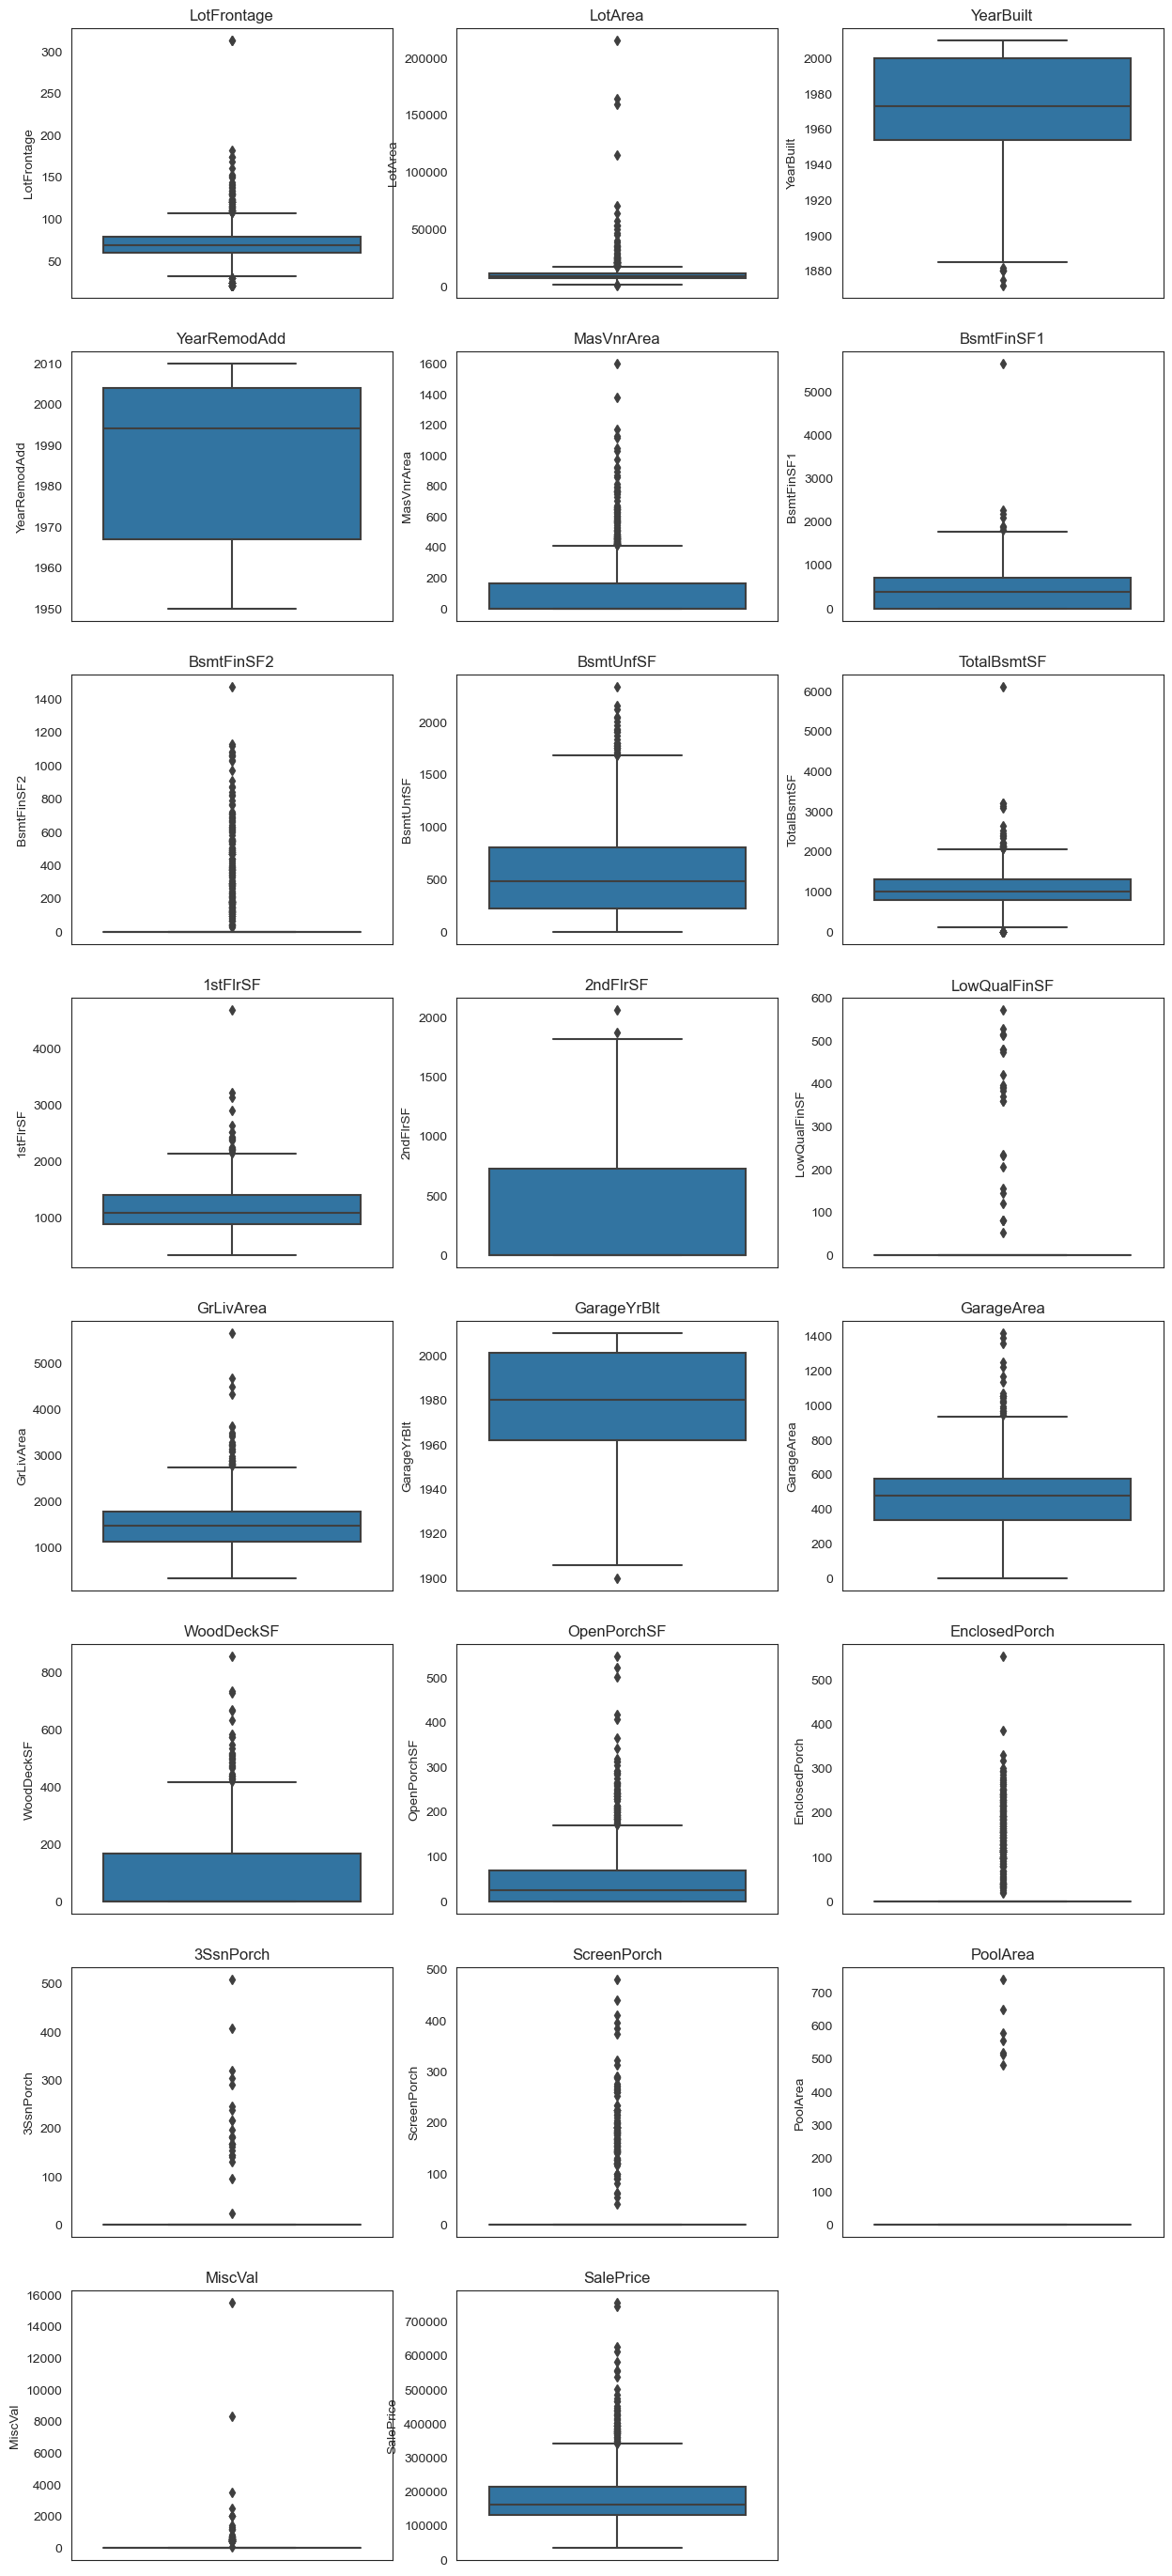

In [428]:
# Plot Box plots for Numerical columns and check for any outliers
#
plt.figure(figsize = (15, 35))

ax = 1
for col in numerical_cols:
    plt.subplot(8, 3, ax)
    plt.title(col)
    sns.boxplot(y = col, data = housing_df)
    ax += 1

In [429]:
housing_df[numerical_cols].describe() # gives a brief stats of each column

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,10516.828082,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,1978.589041,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,22.027677,9981.264932,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,23.997022,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,60.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,1962.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,1980.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,79.000000,11601.500000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,2001.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,2010.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


Here, the outliers seems very high compared to 75% quantile range. So removing everything above 75% will lead to a very high percentage of data reduction which should not be done. We will change the upper qunatile region to 95% and lower to 5%.

In [430]:
# It seems there are outliers for the following columns:
#
columns = [
    'LotFrontage', 'LotArea', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
    'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 
    'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 
    'SalePrice'
]

# Method: Calculate Inter Quantile Range (IQR) and remove all values which are 1.5 times smaller or larger
#.        than the IQR.
#
Q1 = housing_df[columns].quantile(0.1)
Q3 = housing_df[columns].quantile(0.9)
IQR = Q3 - Q1
print("===== Q1: 5% =====")
print(Q1)
print("\n===== Q3: 95% =====")
print(Q3)

original_len = housing_df.shape[0]
housing_df = housing_df[~((housing_df[columns] < (Q1 - 1.5 * IQR)) |(housing_df[columns] > (Q3 + 1.5 * IQR))).any(axis = 1)]
new_len = housing_df.shape[0]
percentage = round((original_len - new_len) / original_len * 100, 2)

print("\n")
print("percentage of rows removed: " + str(percentage) + "%")
print("shape: " + str(housing_df.shape))

===== Q1: 5% =====
LotFrontage          49.0
LotArea            5000.0
YearBuilt          1924.9
MasVnrArea            0.0
BsmtFinSF1            0.0
BsmtFinSF2            0.0
BsmtUnfSF            74.9
TotalBsmtSF         636.9
1stFlrSF            756.9
2ndFlrSF              0.0
LowQualFinSF          0.0
GrLivArea           912.0
GarageYrBlt        1948.0
GarageArea          240.0
WoodDeckSF            0.0
OpenPorchSF           0.0
EnclosedPorch         0.0
3SsnPorch             0.0
ScreenPorch           0.0
PoolArea              0.0
MiscVal               0.0
SalePrice        106475.0
Name: 0.1, dtype: float64

===== Q3: 95% =====
LotFrontage          92.0
LotArea           14381.7
YearBuilt          2006.0
MasVnrArea          335.0
BsmtFinSF1         1065.5
BsmtFinSF2          117.2
BsmtUnfSF          1232.0
TotalBsmtSF        1602.2
1stFlrSF           1680.0
2ndFlrSF            954.2
LowQualFinSF          0.0
GrLivArea          2158.3
GarageYrBlt        2006.0
GarageArea          757.

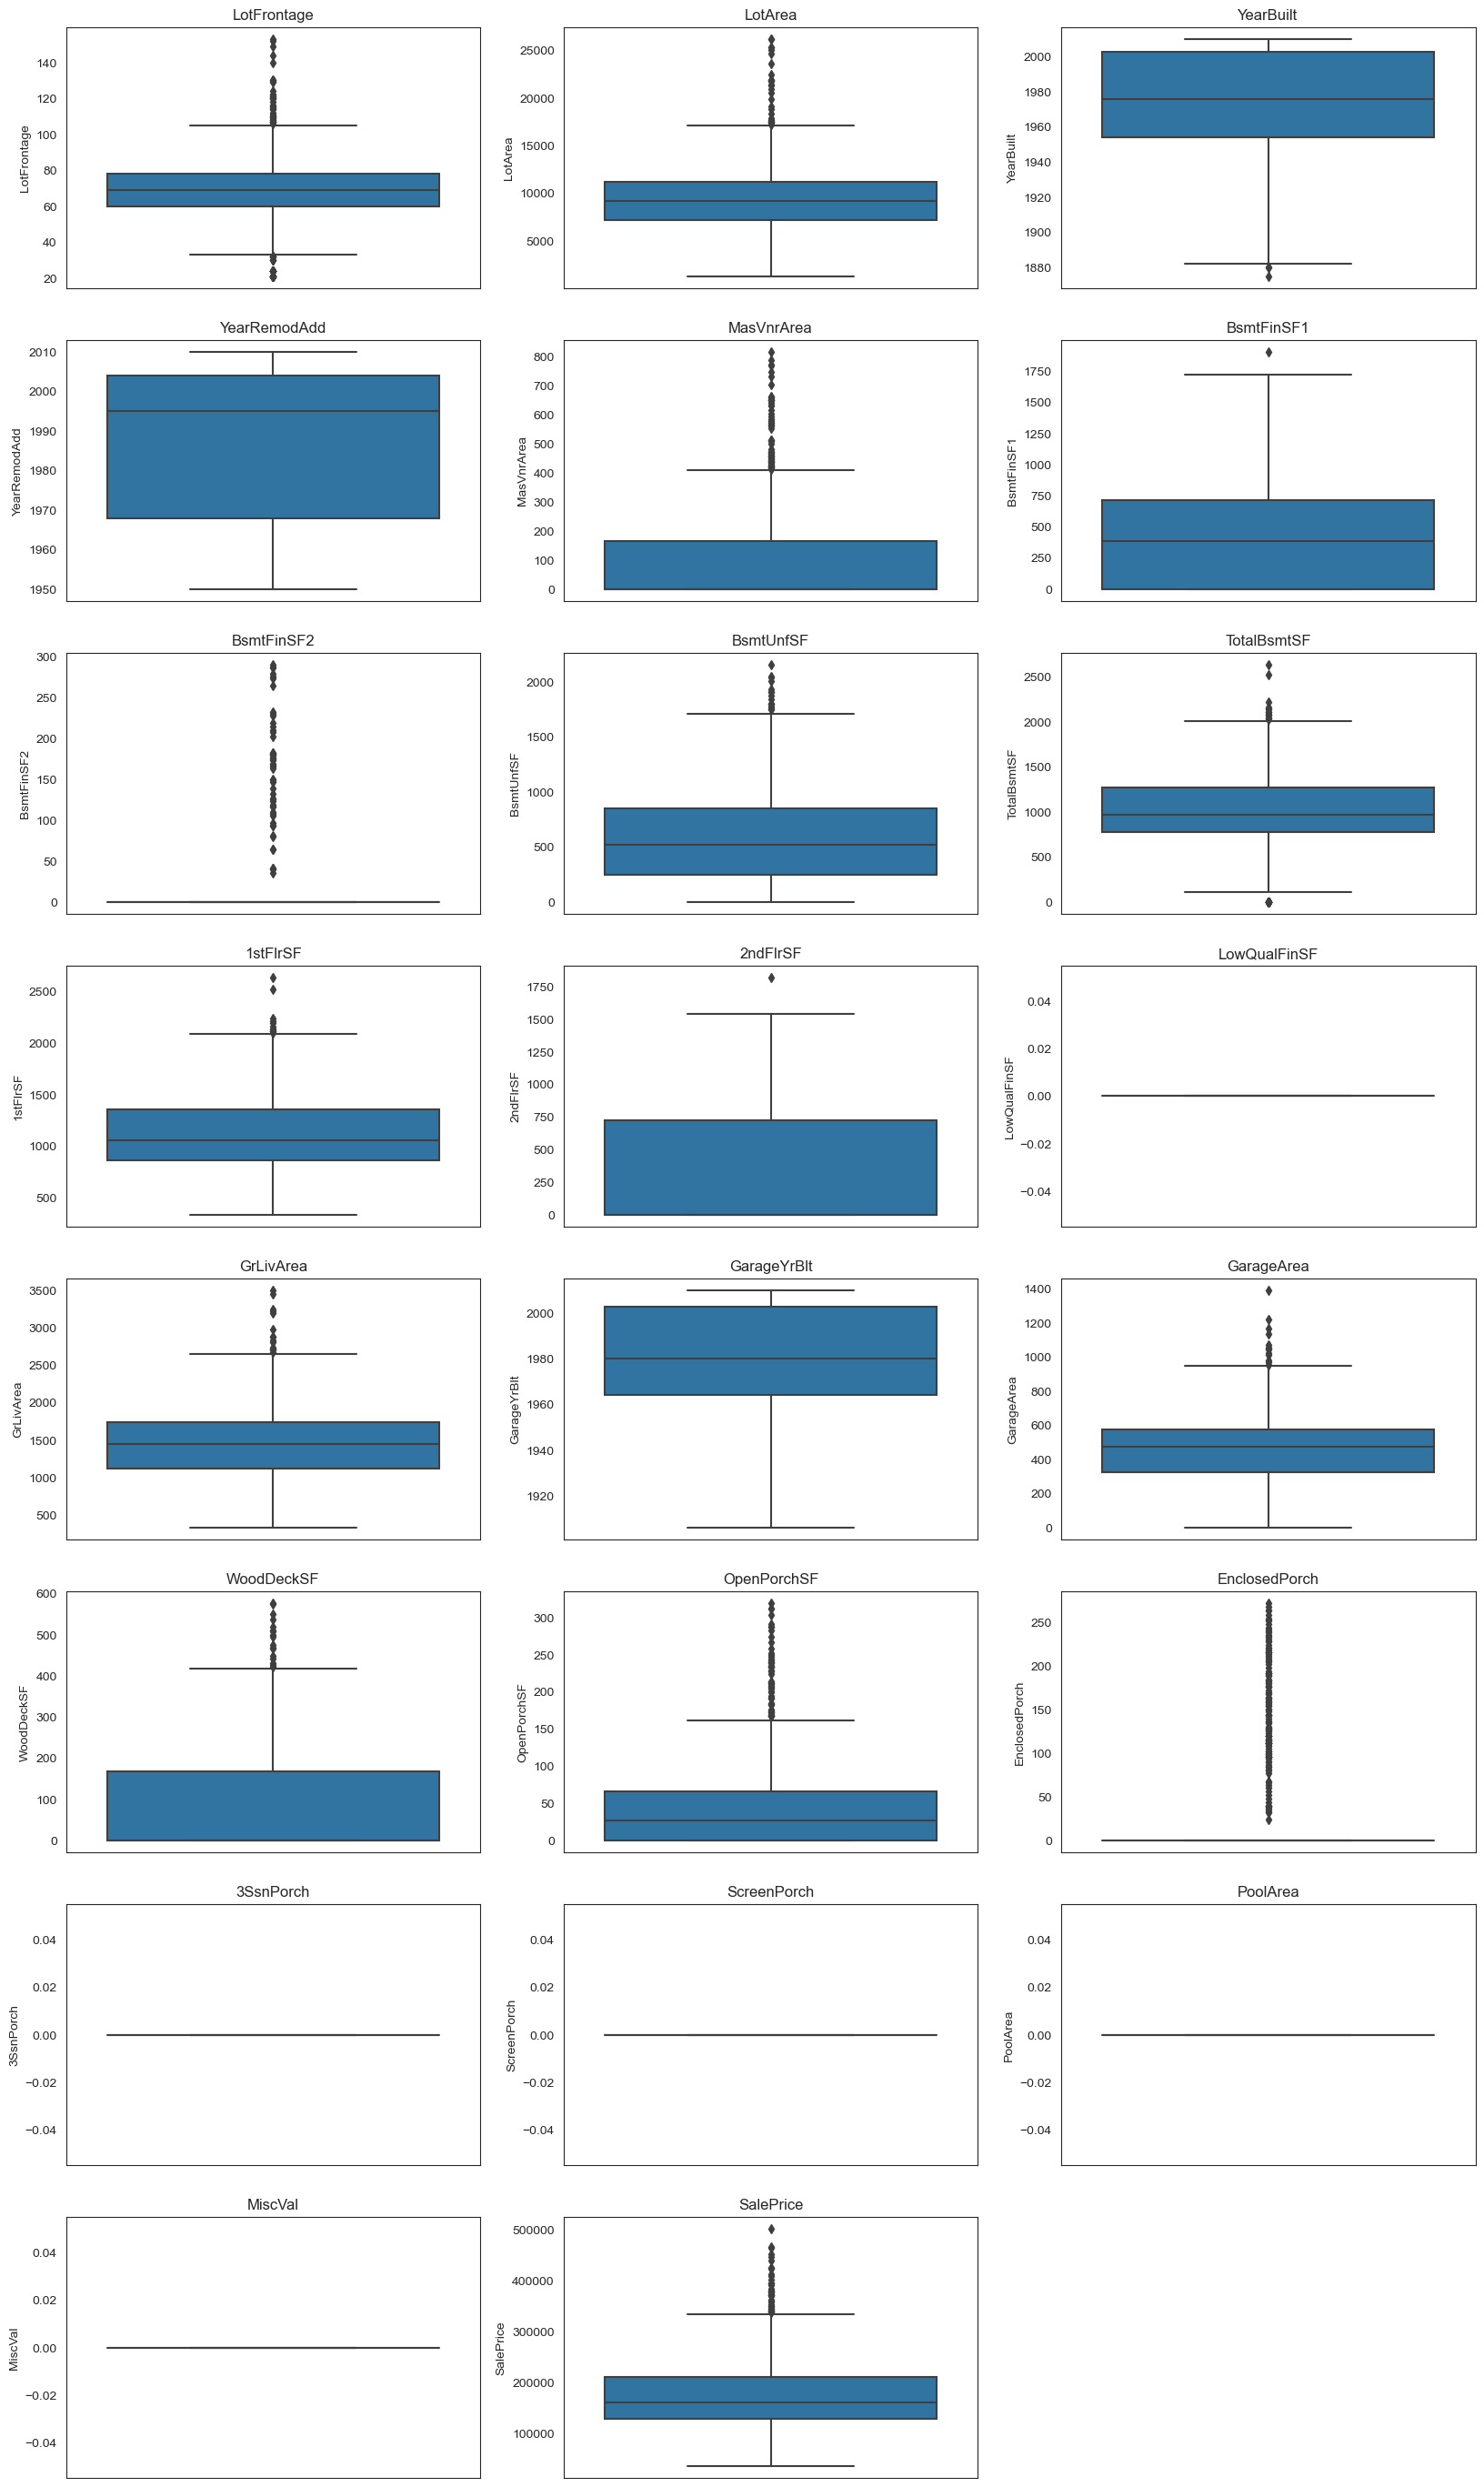

In [431]:
# Rechecking box plots after outlier treatment
#
plt.figure(figsize = (20, 35))

ax = 1
for col in numerical_cols:
    plt.subplot(8, 3, ax)
    plt.title(col)
    sns.boxplot(y = col, data = housing_df)
    ax += 1

The plots seem reasonable now.

**NOTE:** After outlier treatment, somme plots show single values. We can drop them as they won't be adding any insights.

In [432]:
cols = ['MiscVal', 'PoolArea', 'ScreenPorch', '3SsnPorch', 'LowQualFinSF']
housing_df.drop(cols, axis = 1, inplace = True)

# Update numerical_cols variable with remaining cols
#
print("Before:", str(len(numerical_cols)))

for col in cols:
    numerical_cols.remove(col)
    
print("After:", str(len(numerical_cols)))

Before: 23
After: 18


### 1.1.7 Creation of Derived Variables

`HouseAge` - This will be the age of the house.

In [433]:
housing_df['HouseAge'] = housing_df['YrSold'].astype('int') - housing_df['YearBuilt']
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseAge
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,NA,Attchd,2003.0,RFn,2,548,TA,0,61,0,NA,feb,2008,WD,Normal,208500,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,NA,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,1976.0,RFn,2,460,TA,298,0,0,NA,may,2007,WD,Normal,181500,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,TA,0,42,0,NA,sep,2008,WD,Normal,223500,7
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,NA,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,TA,0,35,272,NA,feb,2006,WD,Abnorml,140000,91
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,TA,192,84,0,NA,dec,2008,WD,Normal,250000,8


`GarageAge` - This will be age of Garage from year built till house is sold.

In [434]:
this_year = pd.Timestamp.today().year
housing_df['GarageAge'] = housing_df['YrSold'].astype('int') - housing_df['GarageYrBlt']
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseAge,GarageAge
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,NA,Attchd,2003.0,RFn,2,548,TA,0,61,0,NA,feb,2008,WD,Normal,208500,5,5.0
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,NA,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,1976.0,RFn,2,460,TA,298,0,0,NA,may,2007,WD,Normal,181500,31,31.0
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,TA,0,42,0,NA,sep,2008,WD,Normal,223500,7,7.0
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,NA,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,TA,0,35,272,NA,feb,2006,WD,Abnorml,140000,91,8.0
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,TA,192,84,0,NA,dec,2008,WD,Normal,250000,8,8.0


In [435]:
# We can now drop the unnecessary columns for which derived columns have been derived.
#
cols = ['YearBuilt', 'YrSold', 'GarageYrBlt']
housing_df.drop(cols, axis = 1, inplace = True)
housing_df.shape

(1125, 58)

In [436]:
# Update numerical_cols and categorical variables with remaining cols
#
cols = ['YearBuilt', 'GarageYrBlt']
print("Before:", str(len(numerical_cols)))

for col in cols:
    numerical_cols.remove(col)
    
print("After:", str(len(numerical_cols)))

for col in ['HouseAge', 'GarageAge']:
    numerical_cols.append(col)

categorical_cols.remove('YrSold')

Before: 18
After: 16


## 1.2 EDA - Exploratory Data Analysis

### 1.2.1 Data Visualization

#### 1.2.1.1 Visualizing Numerical variables

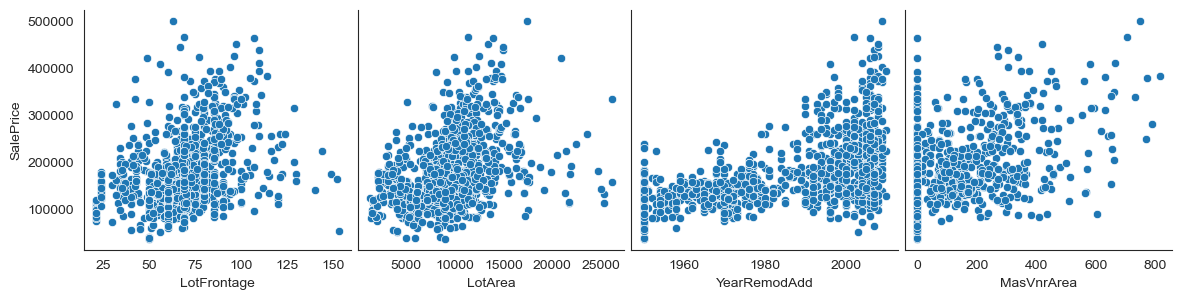

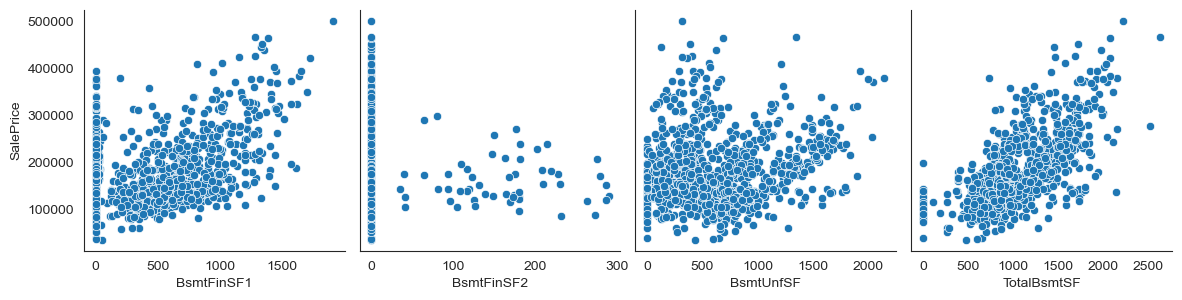

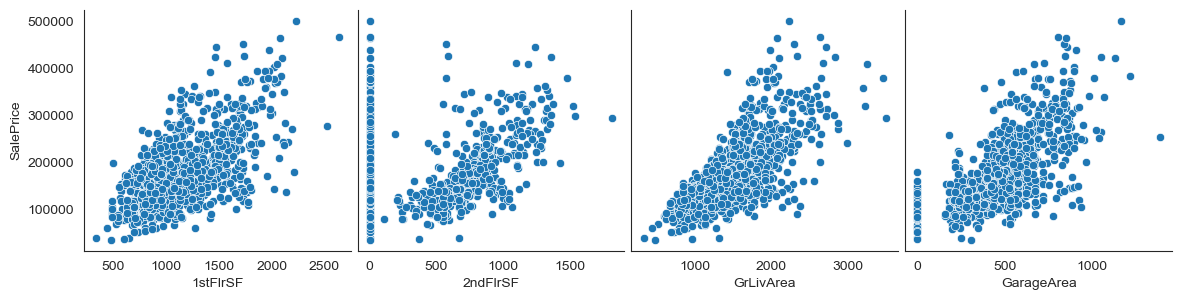

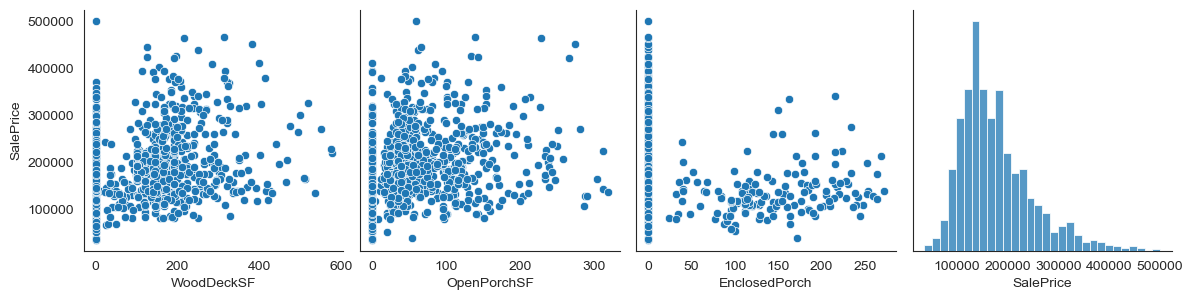

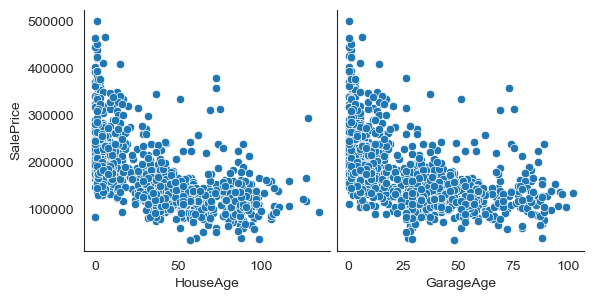

In [437]:
# We will do a scatter plot to see correlation between variables.
# 
# Since there are too many variables, we will just show coorelation of different variables 
# with the target variable.
#
for i in range(0, len(numerical_cols), 4):
    # Select the current group of columns
    group = numerical_cols[i:i + 4]
    sns.pairplot(housing_df, x_vars = group, y_vars = 'SalePrice', height = 3, kind = 'scatter')
    plt.show()

**Inferences**

The following variables seem to have liear corrleation with the target variable:
- `GarageArea`
- `GrLivArea`
- `1stFlrSF`
- `TotalBsmtSF`

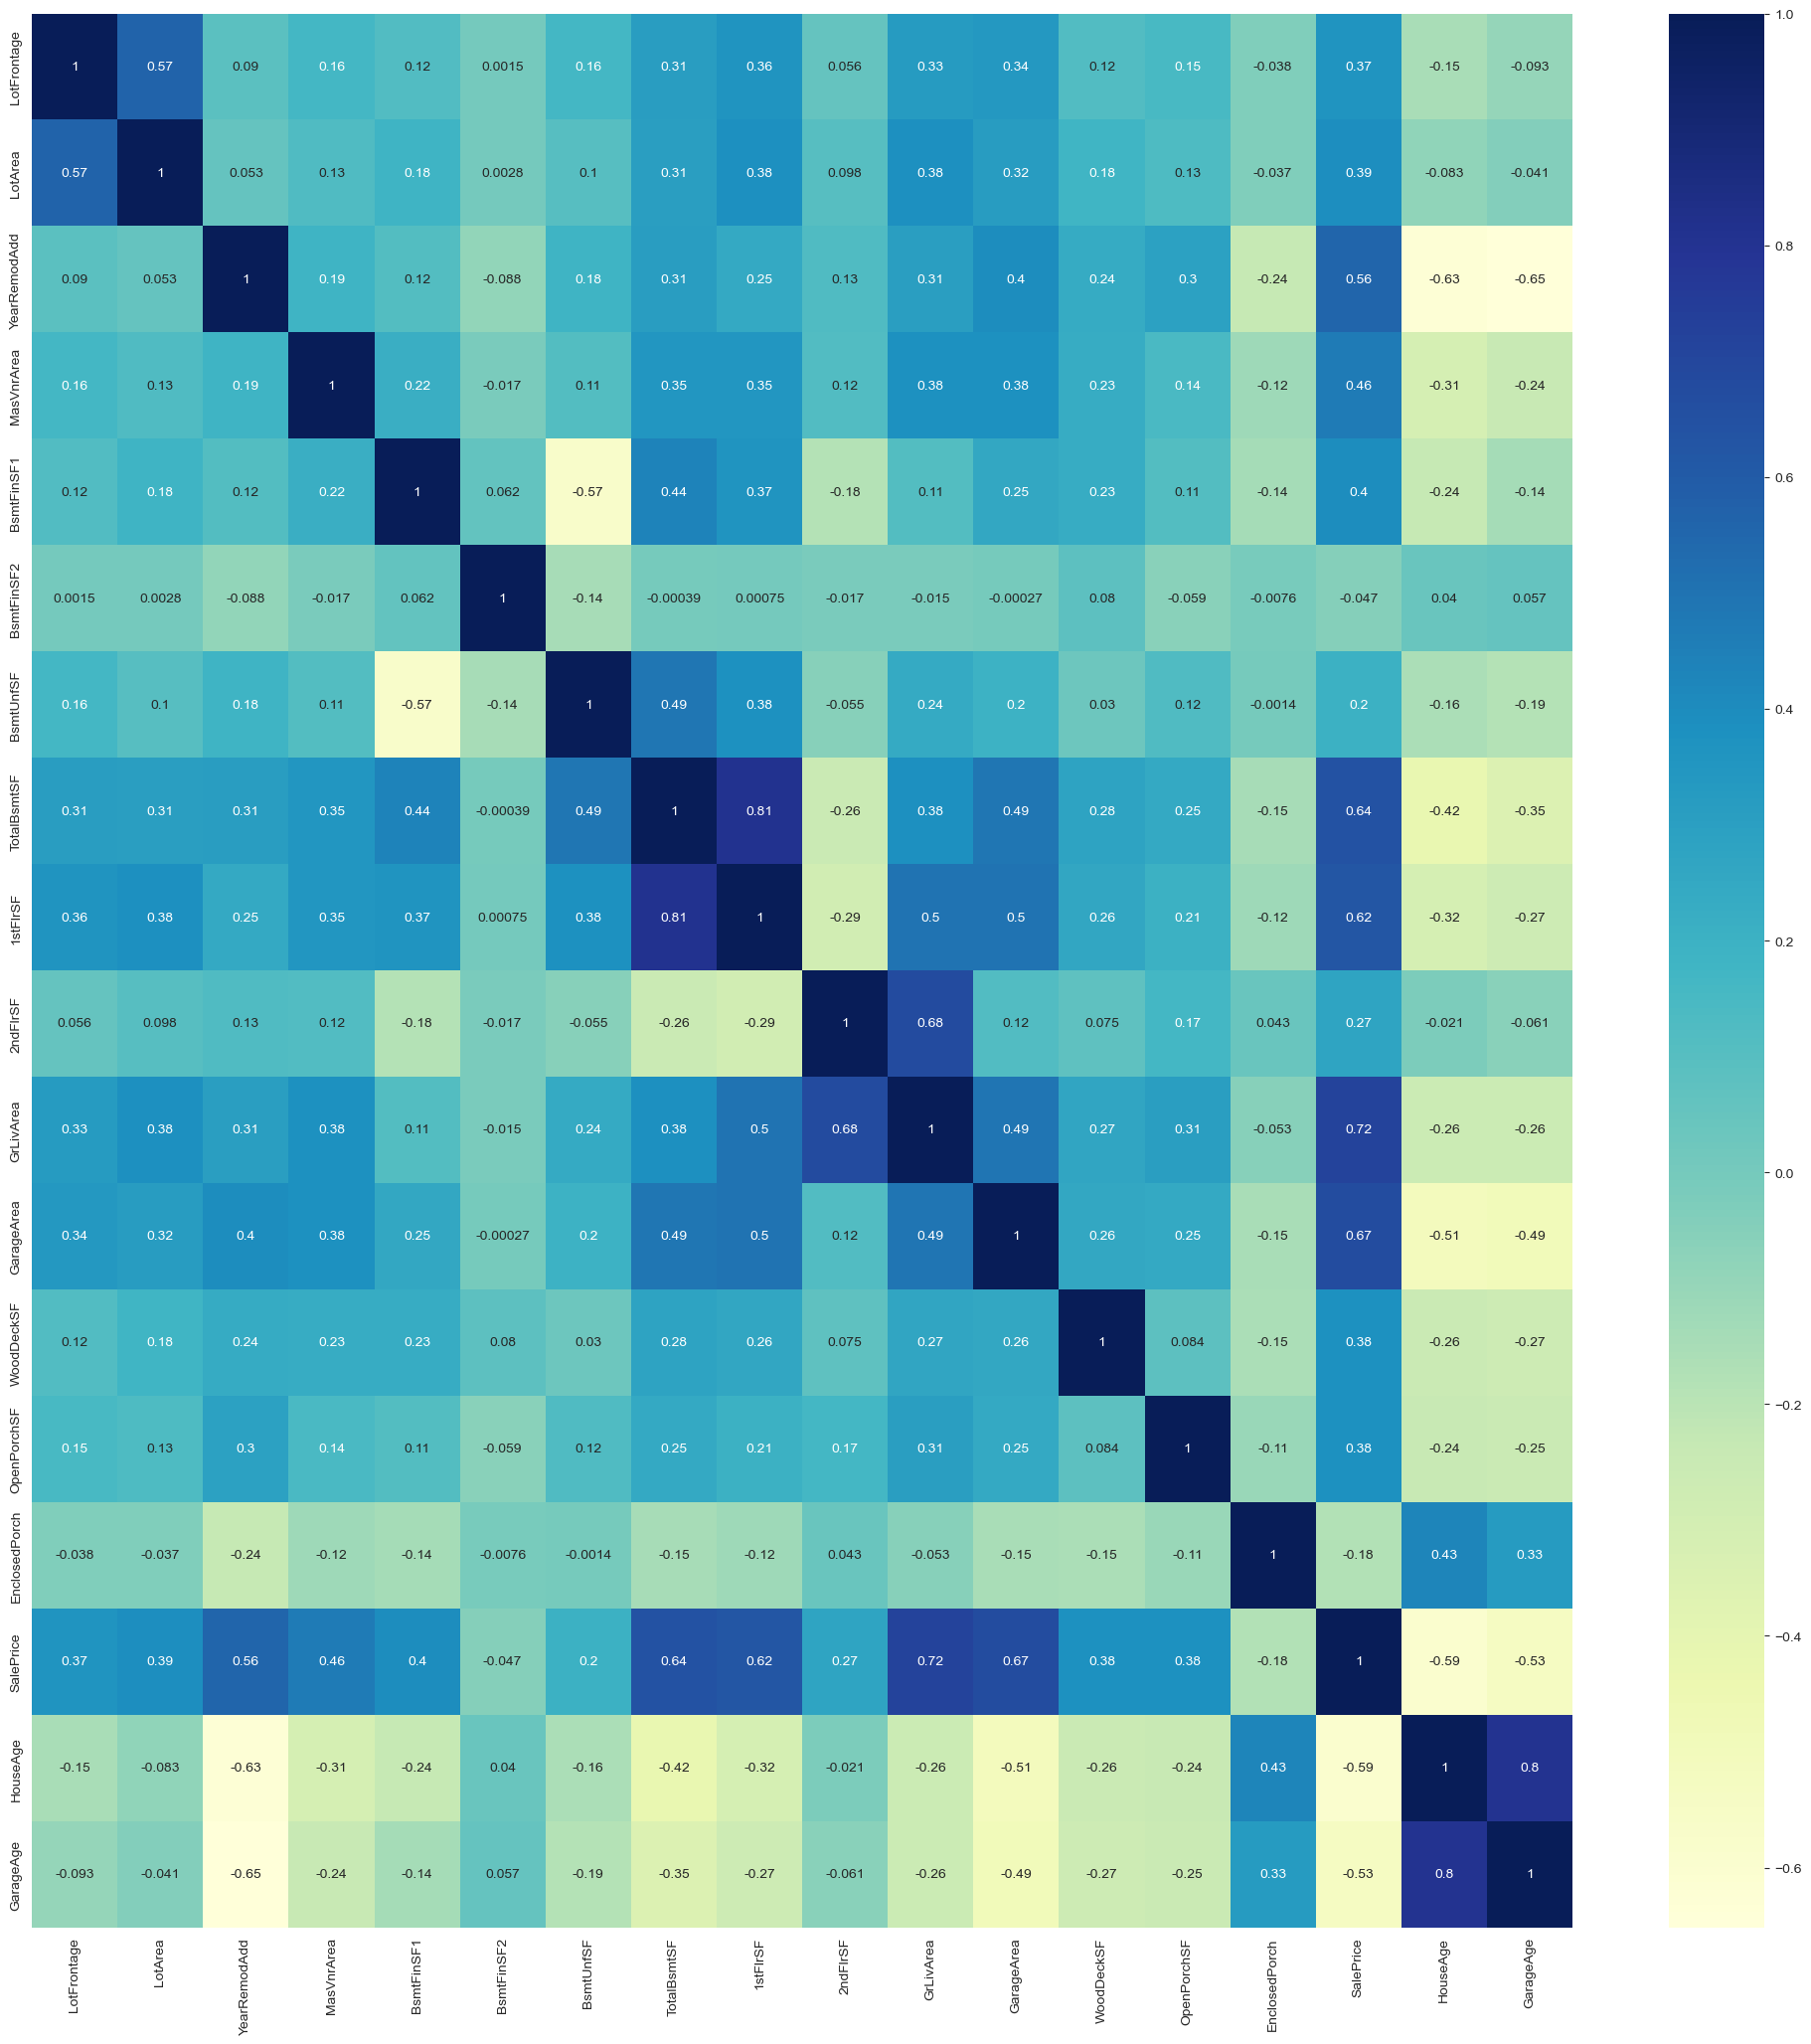

In [438]:
# We will also plot a heat map to have exact correlation values
#
plt.figure(figsize = (25, 25))
color = plt.get_cmap('YlGnBu')   # default color
color.set_bad('lightblue')
sns.heatmap(housing_df[numerical_cols].corr(), cmap = color, annot = True)
plt.show()

**Inferences**
- There seems to be good correlation of `SalePrice` with `TotalBsmtSF`, `1stFlrSF`, `GrLivArea`, `GarageArea`. Hence performing linear regression makes sense here.
- There is high correlation between `TotalBsmtSF` and `1stFlrSF`, `HouseAge` and `GarageAge` which suggests multicolinearity. We will remove based on variable selection process.
- There are minor negative correlations with the target variable and `HouseAge` and `GarageAge` are highly negatively correlated.

#### 1.2.1.2 Visualizing Categorical variables

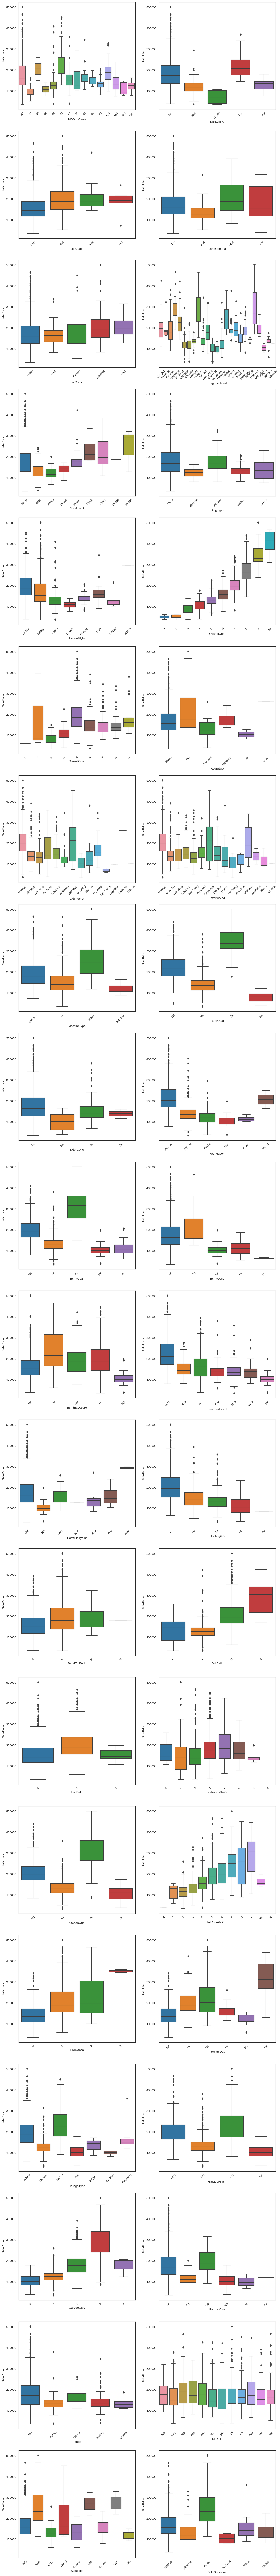

In [439]:
# There are 41 variables
#
plt.figure(figsize = (15, 150))

cnt = 1
for col in categorical_cols:
    plt.subplot(20, 2, cnt)
    ax = sns.boxplot(x = col, y = 'SalePrice', data = housing_df)
    plt.setp(ax.get_xticklabels(), rotation = 45)
    cnt += 1
 
plt.show()

**Inferences**
- The median prices for `2-STORY 1946 & NEWER` and `1-STORY W/FINISHED ATTIC ALL AGES` types is very high compared to other types.
- median of `Floating Village Residential` types is almost double from other types. Probably due to their high construction and maintainence cost as they are built on water bodies.
- `Regular` shape asks less price compared to `Irregular` shapes - probably due to high construction and architecture cost.
- `Northridge` and `Sawyer` neighborhoods have very high prices with highest range in `Northpark Villa`.
- High prices for proximity with railroad and highest for `Within 200' of North-South Railroad`.
- `Single-family Detached` and `Townhouse End Unit` ask higher prices than other building types.
- Almost twice the price for `Two and one-half story: 2nd level finished` than other house styles.
- As expected, as Overall Quality in material and finish increases, the prices increase **exponentially**.
- Houses with `Average` condition go for higher prices probably because they would be in demand for budget buyers, while the very demand increases the prices. Strange to see `Poor` quality houses have very high upper end, suggesting some scam or illegal activity.
- Highest price for high Basement height of `100+ inches`.
- Strange to see Total rooms above grade increase steadily but fall sharply after 11. Same with Garage cars of over 3.

# 2. Model Building and Evaluation

## 2.1 Data Preparation

### 2.1.1 Creating Dummy Variables

In [440]:
# Before creating dummy variables
#
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,SaleType,SaleCondition,SalePrice,HouseAge,GarageAge
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,NA,Attchd,RFn,2,548,TA,0,61,0,NA,feb,WD,Normal,208500,5,5.0
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,Gable,MetalSd,MetalSd,NA,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,RFn,2,460,TA,298,0,0,NA,may,WD,Normal,181500,31,31.0
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,RFn,2,608,TA,0,42,0,NA,sep,WD,Normal,223500,7,7.0
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,NA,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,Unf,3,642,TA,0,35,272,NA,feb,WD,Abnorml,140000,91,8.0
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,RFn,3,836,TA,192,84,0,NA,dec,WD,Normal,250000,8,8.0


In [441]:
# Create dummy variables for all categorical variables to make them numeric so as to feed them to the LR model.
# This is done by providing each unique value of a categorical variable its own column, except the first one.
# Then if the categorical varaible has a value say 'A', then column 'A' will have value 1 for that row,
# while all other columns will have value 0. To represent the first dropped value, all columns will have 0 value.
#
# NOTE: Create only n-1 variables for a variable with n values since n-1 can explain all the possible values.
#
housing_df = pd.get_dummies(data = housing_df, columns = categorical_cols, drop_first = True, dtype = int)

In [442]:
housing_df.head()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice,HouseAge,GarageAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MoSold_aug,MoSold_dec,MoSold_feb,MoSold_jan,MoSold_jul,MoSold_jun,MoSold_mar,MoSold_may,MoSold_nov,MoSold_oct,MoSold_sep,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondit

In [443]:
housing_df.shape

(1125, 263)

### 2.1.2 Splitting Train and Test Datasets

In [444]:
# Import necessary libs
#
import sklearn
from sklearn.model_selection import train_test_split

In [445]:
df_train, df_test = train_test_split(housing_df, train_size = 0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(787, 263)
(338, 263)


### 2.1.3 Rescaling Features

Two types of scaling:
1. Min-Max Scaling - also called Normalization - to scale any date between 0 and 1.
2. Standardization - shift data so that mean is 0 and SD is 1.

We will use **Min-Max** scaling as it will take care of outliers and scale them between 0 and 1.

In [446]:
# Import necessary libs
#
from sklearn.preprocessing import MinMaxScaler

In [447]:
scaler = MinMaxScaler()

# NOTE: We will only scale numerical variables, since yes/no or 0/1 variables are either or.
df_train[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])

# We need to scale test dataset inorder to correctly predict the data from our model.
# This is done because all the coefficients of our model are on a scaled dataset from 0 to 1.
# So test dataset has to be scaled to the same values.
#
# We never use fit on the test data, since fit calculates min/max and other values for scaling
# This is done because in real world scenario, test data is unseen data. So techically we cannot use
# any preprocessing on it.
#
# So we will use the scaling values determined by fit from the training dataset and transform the test dataset
# using the training fit values.
#
# NOTE: We already have scaler fit on training dataset. Now it just needs to transform the test dataset.
df_test[numerical_cols] = scaler.transform(df_test[numerical_cols])

In [448]:
# Verify that min/max values are 0 and 1
#
df_train[numerical_cols].describe()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice,HouseAge,GarageAge
count,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000
mean,0.359824,0.323340,0.602626,0.122549,0.232126,0.028698,0.290711,0.396885,0.353745,0.192906,0.368459,0.390728,0.162235,0.147766,0.068437,0.311014,0.245800,0.271072
std,0.138223,0.144755,0.342101,0.192141,0.227974,0.133799,0.218764,0.156447,0.157463,0.235632,0.149151,0.173035,0.201516,0.193774,0.198417,0.157366,0.221914,0.241035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.295455,0.243270,0.316667,0.000000,0.000000,0.000000,0.122923,0.297759,0.230535,0.000000,0.254194,0.277049,0.000000,0.000000,0.000000,0.202752,0.037037,0.049020
50%,0.363636,0.317396,0.750000,0.000000,0.211660,0.000000,0.255132,0.375997,0.321879,0.000000,0.361823,0.392623,0.000000,0.087774,0.000000,0.277989,0.229630,0.254902
75%,0.431818,0.399842,0.900000,0.207108,0.390756,0.000000,0.398827,0.498481,0.456285,0.400440,0.453941,0.481967,0.291667,0.216301,0.000000,0.389276,0.385185,0.436275
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [449]:
df_test[numerical_cols].describe()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice,HouseAge,GarageAge
count,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000
mean,0.352811,0.303953,0.579438,0.105773,0.205516,0.022298,0.290781,0.376999,0.329646,0.177429,0.342013,0.370574,0.147046,0.124715,0.086441,0.281684,0.275520,0.275554
std,0.153518,0.156468,0.362280,0.174943,0.217830,0.121675,0.217140,0.145026,0.148149,0.222922,0.141713,0.181338,0.198428,0.168496,0.212250,0.140987,0.233832,0.237927
min,0.000000,-0.007166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064811,0.000000,0.058879,0.000000,0.000000,0.000000,0.000000,0.005550,0.000000,0.000000
25%,0.295455,0.223776,0.266667,0.000000,0.000000,0.000000,0.117913,0.295385,0.228143,0.000000,0.231481,0.244057,0.000000,0.000000,0.000000,0.187158,0.044444,0.058824
50%,0.363636,0.294239,0.758333,0.000000,0.175945,0.000000,0.246823,0.353779,0.306003,0.000000,0.324470,0.378279,0.000000,0.075235,0.000000,0.244818,0.266667,0.264706
75%,0.431818,0.376108,0.900000,0.178309,0.352153,0.000000,0.434506,0.450532,0.396912,0.384351,0.433840,0.469467,0.260417,0.188088,0.000000,0.344116,0.429630,0.428922
max,0.901515,0.998543,1.000000,0.946078,0.864496,1.010453,1.052297,0.817698,0.814702,0.753575,0.803419,1.139344,0.954861,0.912226,0.985294,0.893067,0.940741,0.931373


### 2.1.4 Split Target Variable

In [450]:
# Setting up X_train and y_train
#
# Remove the target variable from the list and set it as y_train
#
y_train = df_train.pop('SalePrice')
y_test = df_test.pop('SalePrice')

# Keep rest of the columns as X_train/X_test
#
X_train = df_train
X_test = df_test

## 2.2 Model Building and Evaluation

Since there are around 263 variables, we will go through the following process:
1. Build a simple LR model with all 263 variables and check how complex the model is and confirm overfitting.
2. Use Ridge Regression with Grid Search Hyperparameter tuning.
3. Use Lasso Regression with Grid Search Hyperparameter tuning.
4. Simple RFE model selecting 15 predictors out of 263.

Post this, the step that generates best results will be considered as the final model.

In [451]:
# Helpful functions

# R-Square values
#
def r_sq(actual, pred, label):
    print(label, "R-sq:", str(r2_score(actual, pred)))

# Other useful metrices:
# RSS, MSE, RMSE
#
def other_metrics(actual, pred, label):
    # Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
    #
    rss = np.sum(np.square(actual - pred))
    print(label, "RSS:", str(rss))

    mse = mean_squared_error(actual, pred)
    print(label, "MSE:", str(mse))

    # Root Mean Squared Error
    #
    rmse = mse ** 0.5
    print(label, "RMSE:", str(rmse))

# Residual Analysis Plots
#
def residual_analysis(actual, pred, label):
    # Residuals
    #
    residuals = actual - pred
    plt.scatter(pred, residuals)
    plt.axhline(y = 0, color = 'r', linestyle = ':')
    plt.title("Residuals Distribution - " + label)
    plt.xlabel("Predictions")
    plt.ylabel("Residuals")
    plt.show()
    
    # Distribution of errors
    #
    p = sns.distplot(residuals, kde = True)
    p = plt.title("Normality of error terms/residuals - " + label)
    plt.xlabel("Residuals")
    plt.show()
    
    # Actual vs Predicted
    #
    sns.set_style("white")
    plt.scatter(actual, pred)
    plt.title("Actual vs Predicted - " + label)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.grid(True)
    plt.show()

### 2.2.1 Simple LR model with ALL variables

In [452]:
# Import necessary libs
#
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

#### 2.2.1.1 Building and Predicting

In [453]:
# Simple LR with all variables as predictors
#
lm = LinearRegression()
lm.fit(X_train, y_train)

# Prediction on Train dataset
#
y_train_pred = lm.predict(X_train)
r_sq(y_train, y_train_pred, "Train")

# Prediction on Test dataset
#
y_test_pred = lm.predict(X_test)
r_sq(y_test, y_test_pred, "Test")

# Other metrics
#
other_metrics(y_train, y_train_pred, "Train")
other_metrics(y_test, y_test_pred, "Test")

Train R-sq: 0.9645892832263941
Test R-sq: -4.9507849036123784e+16
Train RSS: 0.6892571403072226
Train MSE: 0.0008758032278363693
Train RMSE: 0.029593972829553814
Test RSS: 3.3163513644250016e+17
Test MSE: 981169042729290.4
Test RMSE: 31323617.969980583


**Conclusion**

1. As you can see Test R-sq is way off the Train R-sq (which is too good with 96% accuracy) and is also negative, suggesting that the model has memorized the training data and is unable to do predictions correctly. This is a clear case of **Overfitting**.
2. All the metrics of test data are dangerously high. This is clearly a bad model. We need to reduce the complexity.

### 2.2.2 Ridge Regression with ALL variables

In [454]:
# Import necessary libs
#
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

#### 2.2.2.1 Hyperparameter Tunining

In [455]:
# Cols
print(X_train.shape)

# Picking a range of alphas
#
params = {
    'alpha': [
        0.0001, 0.001, 0.01, 0.05, 0.1, 
        0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
        2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0
    ]
}

ridge = Ridge()
folds = 5

model_cv = GridSearchCV(
    estimator = ridge, param_grid = params, 
    scoring= 'r2', cv = folds, 
    return_train_score = True, verbose = 1
)

model_cv.fit(X_train, y_train)

(787, 262)
Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [456]:
# Select only necessary cols from results
#
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
13,1.0,0.964638,0.925705,1
12,0.9,0.964955,0.925592,2
11,0.8,0.965276,0.925416,3
14,2.0,0.961700,0.925211,4
10,0.7,0.965602,0.925159,5
9,0.6,0.965933,0.924792,6
8,0.5,0.966271,0.924273,7
15,3.0,0.959077,0.923707,8
7,0.4,0.966616,0.923531,9
6,0.3,0.966970,0.922434,10


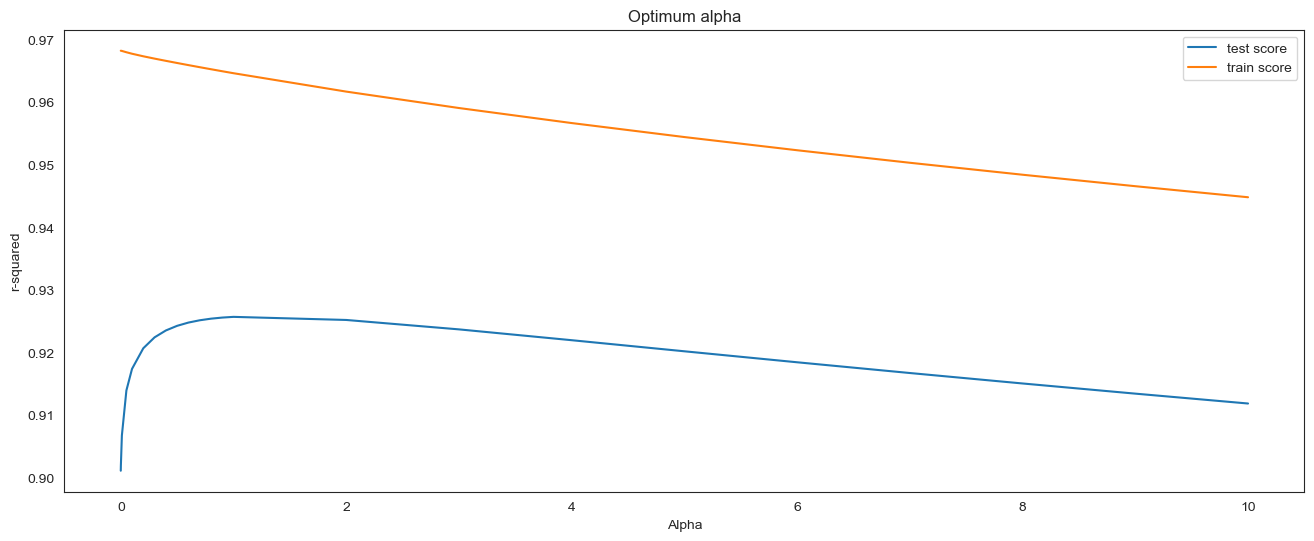

In [457]:
# plotting cv results
plt.figure(figsize = (16, 6))

plt.plot(cv_results["param_alpha"], cv_results["mean_test_score"])
plt.plot(cv_results["param_alpha"], cv_results["mean_train_score"])
plt.xlabel('Alpha')
plt.ylabel('r-squared')
plt.title("Optimum alpha")
plt.legend(['test score', 'train score'], loc = 'upper right')

We will pick the alpha of 1 since the test and train R-sq scores are closest there.

#### 2.2.2.2 Building

In [458]:
# Now we will use alpha as 1 and train the Ridge model
#
alpha = 1
ridge = Ridge(alpha = alpha)
ridge.fit(X_train, y_train)

print("Intercept:", ridge.intercept_)
print("Coefficients:\n", ridge.coef_)

Intercept: 0.1309638447918844
Coefficients:
 [-2.69346462e-02  5.44010023e-02  1.13717953e-02  1.09621899e-02
  8.68989389e-02  1.04226290e-02  2.74755855e-02  8.53254546e-02
  9.53764038e-02  9.61801726e-02  1.24762870e-01  6.43495405e-02
  2.34473998e-02  1.63567664e-02  8.06295195e-03 -8.83967477e-02
  7.85581840e-03  3.72486581e-03  1.16332959e-02  1.25294510e-02
  3.88341230e-03  4.39148588e-03  2.22180089e-02 -1.49807227e-02
 -2.32987342e-02 -7.02768665e-03 -1.77512442e-02 -3.06765307e-02
 -3.05254167e-02 -1.07440482e-02 -3.49269150e-03  1.73015491e-02
 -3.45151225e-03  1.86579830e-02  2.05140337e-02  1.92175164e-02
 -8.67200921e-03  5.11506725e-03  1.68666629e-02 -1.08256885e-02
  4.28510462e-03  6.88681489e-03 -2.11072713e-02 -3.60914745e-02
 -5.08970277e-03  0.00000000e+00  4.49953944e-03 -1.25142003e-02
  6.48934898e-03 -1.20764303e-02  2.79195420e-02 -3.33306243e-02
 -2.09244954e-02 -3.00411252e-02 -5.47531648e-03 -2.05367938e-02
 -1.36445775e-02  1.70820269e-02 -1.92892549e

#### 2.2.2.3 Predicting

In [459]:
# Making predictions
#
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

r_sq(y_train, y_train_pred, "Train")
r_sq(y_test, y_test_pred, "Test")
other_metrics(y_train, y_train_pred, "Train")
other_metrics(y_test, y_test_pred, "Test")

Train R-sq: 0.9621755272052317
Test R-sq: 0.8756573767366573
Train RSS: 0.7362400518134324
Train MSE: 0.0009355019718086816
Train RMSE: 0.030585976718239385
Test RSS: 0.832926164929294
Test MSE: 0.002464278594465367
Test RMSE: 0.0496415007273689


The values look good. Even though there is quite a drop in R-sq from training dataset to test, the values are good and workable.

#### 2.2.3.4 Residual Analysis

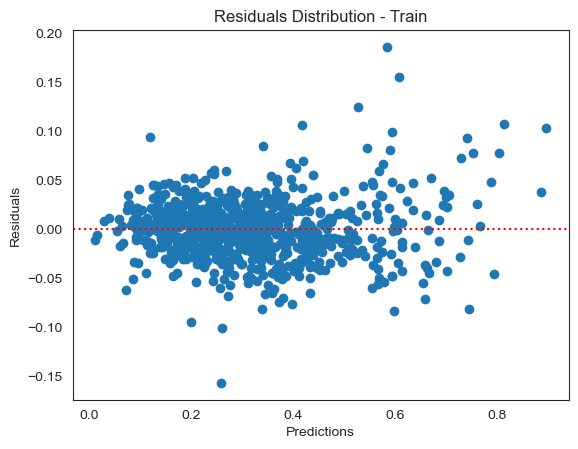

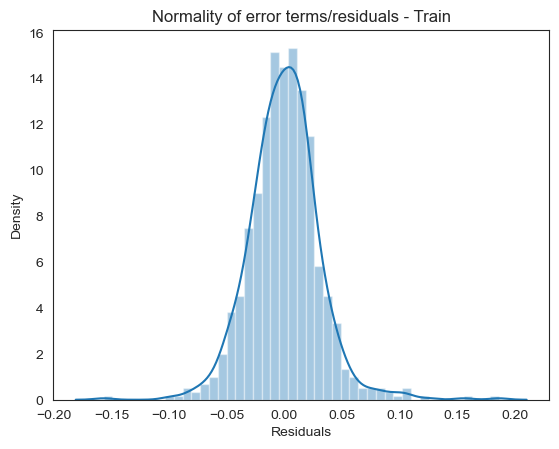

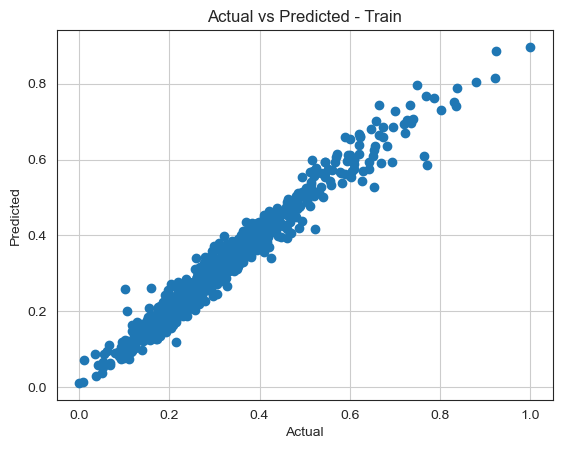

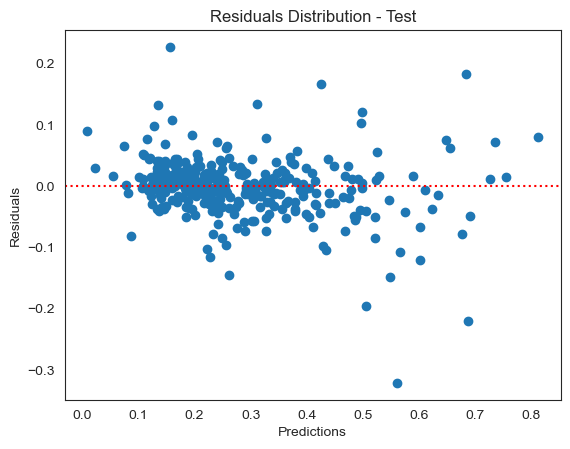

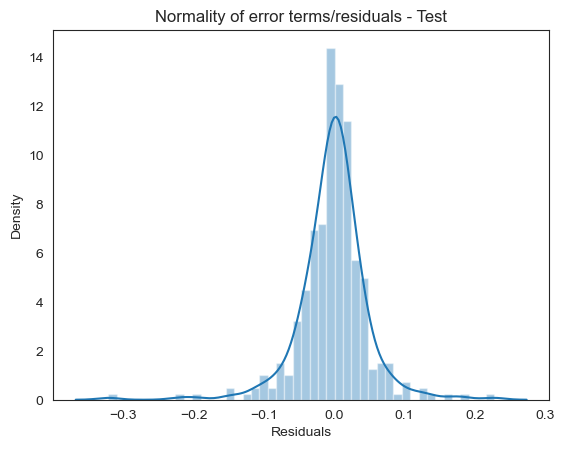

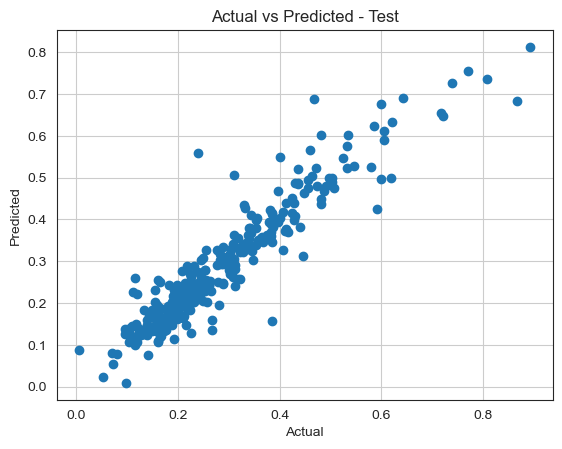

In [460]:
residual_analysis(y_train, y_train_pred, 'Train')
residual_analysis(y_test, y_test_pred, 'Test')

**Conclusion**
1. Residuals show random and equal distribution for both train and test sets along the 0 line.
2. There is no visible pattern in the Residuals.
3. Error terms are normally distributed with mean as 0.
4. Actual vs Predicted show a 45 degree linear line.
5. All these factor suggest that Linear Regression was the right choice.
6. Alpha value = `1`.
7. Data suggests that `88%` of Sale price can be predicted by the given variables.
8. We will list the top 10 variables.

In [461]:
# Top coefficients affecting the price
#
ridge_df = pd.DataFrame({
    'Features': X_train.columns, 
    'Coefficient': ridge.coef_.round(2), 
    'Abs_Coeff_Val': abs(ridge.coef_.round(2))
})

ridge_df = ridge_df.sort_values(by = 'Abs_Coeff_Val', ascending = False)
ridge_df.reset_index(drop = True, inplace = True)
ridge_df.head(10)

,Features,Coefficient,Abs_Coeff_Val
0,GrLivArea,0.12,0.12
1,1stFlrSF,0.10,0.10
2,2ndFlrSF,0.10,0.10
3,Neighborhood_StoneBr,0.09,0.09
4,BsmtFinSF1,0.09,0.09
5,HouseAge,-0.09,0.09
6,TotalBsmtSF,0.09,0.09
7,OverallQual_10,0.07,0.07
8,OverallQual_9,0.06,0.06
9,SaleType_CWD,0.06,0.06


### 2.2.3 Lasso Regression with ALL variables

In [462]:
# Import necessary libs
#
from sklearn.linear_model import Lasso

#### 2.2.3.1 Hyperparameter Tunining

In [463]:
# Cols
print(X_train.shape)

# Picking a range of alphas
#
params = {
    'alpha': [
        0.0001, 0.001, 0.01, 0.05, 0.1, 
        0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
        2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0
    ]
}

lasso = Lasso()
folds = 5

model_cv = GridSearchCV(
    estimator = lasso, param_grid = params, 
    scoring= 'r2', cv = folds, 
    return_train_score = True, verbose = 1
)

model_cv.fit(X_train, y_train)

(787, 262)
Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [464]:
# Select only necessary cols from results
#
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,0.960903,0.928712,1
1,0.001,0.916622,0.895092,2
2,0.01,0.662396,0.652260,3
20,8.0,0.000000,-0.004722,4
19,7.0,0.000000,-0.004722,4
18,6.0,0.000000,-0.004722,4
17,5.0,0.000000,-0.004722,4
16,4.0,0.000000,-0.004722,4
15,3.0,0.000000,-0.004722,4
14,2.0,0.000000,-0.004722,4


Here we see that we have very high value of R-sq for `alpha` values between 0 to 0.1. Hence we will take a range between 0.0001 and 0.01.

In [465]:
params = {
    'alpha': [
        0, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01
    ]
}

lasso = Lasso()
folds = 5

model_cv = GridSearchCV(
    estimator = lasso, param_grid = params, 
    scoring= 'r2', cv = folds, 
    return_train_score = True, verbose = 1
)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0, 5e-05, 0.0001, 0.0005, 0.001, 0.005,
                                   0.01]},
             return_train_score=True, scoring='r2', verbose=1)

In [466]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
2,0.0001,0.960903,0.928712,1
1,0.00005,0.964286,0.927987,2
3,0.0005,0.939969,0.918570,3
0,0,0.968199,0.902881,4
4,0.001,0.916622,0.895092,5
5,0.005,0.783890,0.767681,6
6,0.01,0.662396,0.652260,7


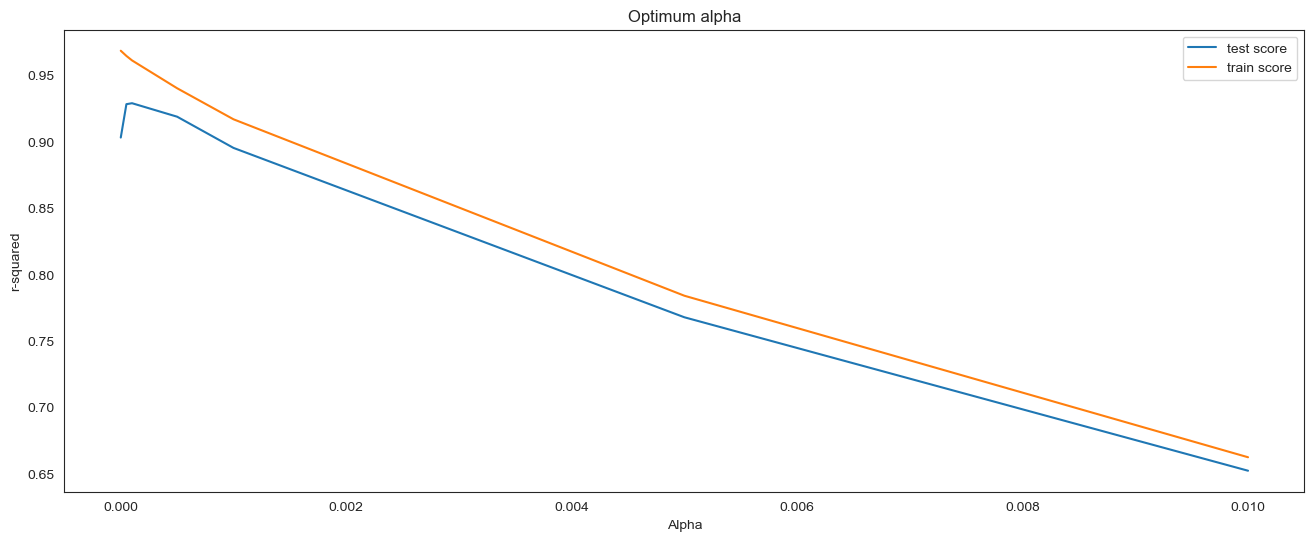

In [467]:
# plotting cv results
plt.figure(figsize = (16, 6))

plt.plot(cv_results["param_alpha"], cv_results["mean_test_score"])
plt.plot(cv_results["param_alpha"], cv_results["mean_train_score"])
plt.xlabel('Alpha')
plt.ylabel('r-squared')
plt.title("Optimum alpha")
plt.legend(['test score', 'train score'], loc = 'upper right')

We will pick the `alpha` of `0.0005` since the test and train R-sq scores are quite close.

#### 2.2.3.2 Building

In [468]:
# Now we will use alpha as 0.0005 and train the Lasso model
#
alpha = 0.0005
lasso = Lasso(alpha = alpha)
lasso.fit(X_train, y_train)

print("Intercept: ", lasso.intercept_)
print("Coefficients:\n ", lasso.coef_.round(2))

Intercept:  0.08245010055351587
Coefficients:
  [ 0.    0.04  0.03  0.01  0.07  0.    0.    0.11  0.    0.    0.31  0.05
  0.01  0.01  0.   -0.04 -0.   -0.    0.    0.    0.    0.    0.   -0.
 -0.   -0.   -0.01 -0.01 -0.01 -0.   -0.    0.   -0.    0.01 -0.    0.
 -0.    0.    0.   -0.    0.    0.01 -0.   -0.   -0.    0.   -0.    0.
  0.   -0.    0.04 -0.01 -0.   -0.   -0.   -0.    0.    0.   -0.    0.02
  0.02 -0.    0.   -0.   -0.    0.02  0.06 -0.    0.   -0.    0.01  0.
  0.   -0.    0.    0.    0.   -0.   -0.01 -0.   -0.01  0.    0.    0.
 -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.01 -0.    0.01  0.05  0.1
  0.09 -0.   -0.02 -0.02 -0.01  0.    0.01  0.    0.   -0.    0.    0.
  0.    0.    0.   -0.    0.01  0.   -0.   -0.   -0.    0.   -0.    0.
  0.    0.   -0.    0.   -0.   -0.    0.    0.   -0.    0.    0.   -0.
  0.    0.    0.    0.   -0.   -0.   -0.    0.   -0.   -0.01 -0.02 -0.01
 -0.    0.   -0.    0.01  0.   -0.   -0.   -0.   -0.02  0.   -0.02  0.
  0.   -0.    0.01  0.

#### 2.2.3.3 Predicting

In [469]:
# Making predictions
#
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

r_sq(y_train, y_train_pred, "Train")
r_sq(y_test, y_test_pred, "Test")
other_metrics(y_train, y_train_pred, "Train")
other_metrics(y_test, y_test_pred, "Test")

Train R-sq: 0.9379259128893521
Test R-sq: 0.88895675192405
Train RSS: 1.208250260580923
Train MSE: 0.0015352608139528883
Train RMSE: 0.03918240439218717
Test RSS: 0.7438384709425736
Test MSE: 0.002200705535333058
Test RMSE: 0.04691167802725733


The R-sq values are similar to Ridge regression model. Hence it is a good model too, a little better than Ridge.

#### 2.2.3.4 Residual Analysis

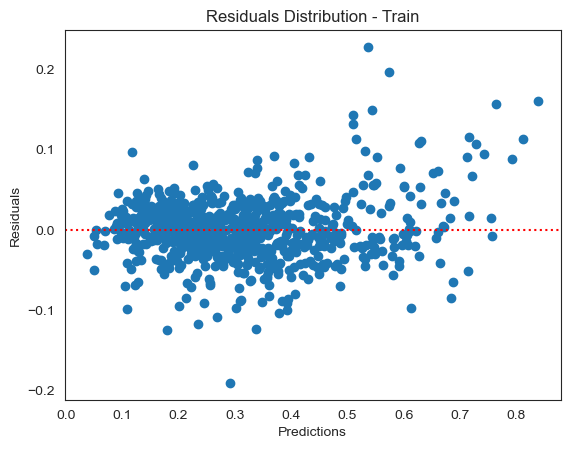

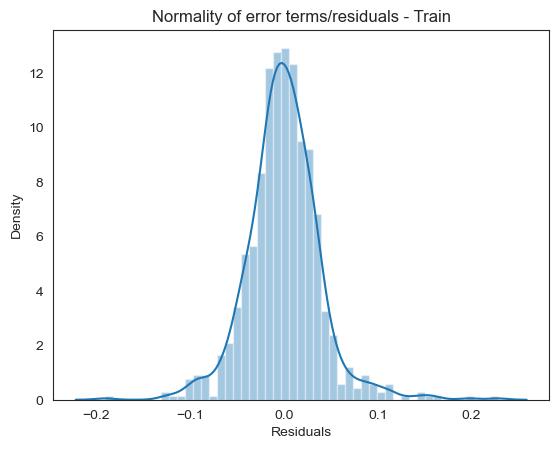

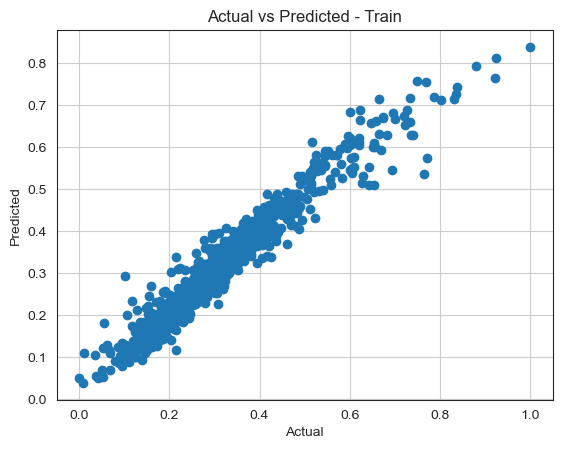

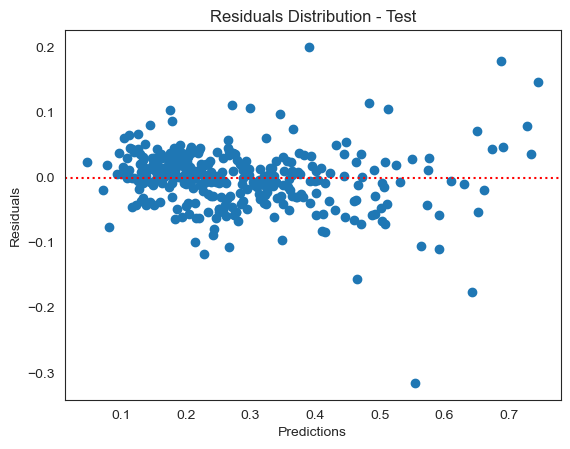

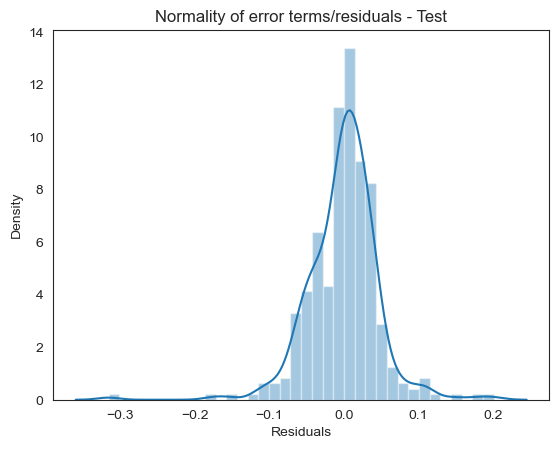

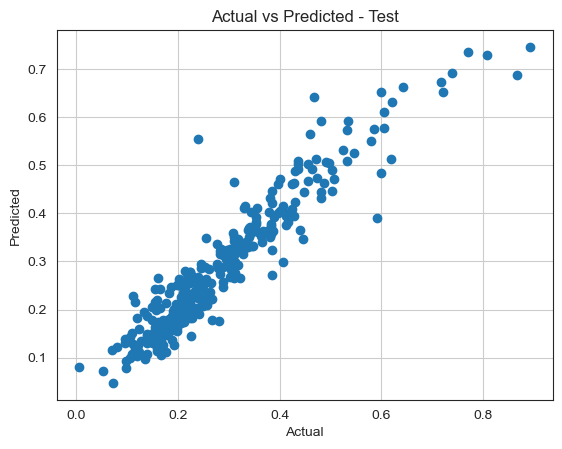

In [470]:
residual_analysis(y_train, y_train_pred, 'Train')
residual_analysis(y_test, y_test_pred, 'Test')

**Conclusion**
1. Residuals show random and equal distribution for both train and test sets along the 0 line.
2. There is no visible pattern in the Residuals.
3. Error terms are normally distributed with mean as 0.
4. All these factor suggest that Linear Regression was the right choice.
5. All these factor suggest that Linear Regression was the right choice.
6. Alpha value = `0.0005`.
7. Data suggests that `88%` of Sale price can be predicted by the given variables.
8. We will list the top 10 variables.

### 2.2.4 Simple RFE model

In [471]:
# Import necessary libs
#
from sklearn.feature_selection import RFE

#### 2.2.4.1 Building

In [472]:
# Running RFE with output variables as an arbitrary number 30
#
lm = LinearRegression()
lm.fit(X_train, y_train)

# Runnning RFE
#
rfe = RFE(lm, n_features_to_select = 15, step = 100)
rfe = rfe.fit(X_train, y_train)

In [473]:
# Variables selected by the RFE
#
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', False, 3),
 ('LotArea', False, 3),
 ('YearRemodAdd', False, 4),
 ('MasVnrArea', False, 4),
 ('BsmtFinSF1', False, 2),
 ('BsmtFinSF2', False, 2),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 2),
 ('2ndFlrSF', False, 2),
 ('GrLivArea', False, 2),
 ('GarageArea', False, 3),
 ('WoodDeckSF', False, 3),
 ('OpenPorchSF', False, 4),
 ('EnclosedPorch', False, 4),
 ('HouseAge', False, 3),
 ('GarageAge', False, 4),
 ('MSSubClass_30', False, 4),
 ('MSSubClass_40', False, 4),
 ('MSSubClass_45', False, 4),
 ('MSSubClass_50', False, 4),
 ('MSSubClass_60', False, 4),
 ('MSSubClass_70', False, 4),
 ('MSSubClass_75', False, 2),
 ('MSSubClass_80', False, 3),
 ('MSSubClass_85', False, 4),
 ('MSSubClass_90', True, 1),
 ('MSSubClass_120', False, 3),
 ('MSSubClass_160', False, 3),
 ('MSSubClass_180', False, 3),
 ('MSSubClass_190', False, 2),
 ('MSZoning_FV', False, 3),
 ('MSZoning_RH', False, 4),
 ('MSZoning_RL', False, 3),
 ('MSZoning_RM', False, 3),
 ('LotShape_

#### 2.2.4.2 Prediction

In [474]:
# Selecting only those columns where RFE support is True
#
cols = X_train.columns[rfe.support_]
print(cols)

# predict prices of X_test
#
y_train_pred = rfe.predict(X_train)
y_test_pred = rfe.predict(X_test)

r_sq(y_train, y_train_pred, "Train")
r_sq(y_test, y_test_pred, "Test")
other_metrics(y_train, y_train_pred, "Train")
other_metrics(y_test, y_test_pred, "Test")

Index(['BsmtUnfSF', 'TotalBsmtSF', 'MSSubClass_90', 'BldgType_Duplex',
       'Fireplaces_1', 'Fireplaces_2', 'Fireplaces_3', 'FireplaceQu_NA',
       'GarageType_NA', 'GarageFinish_NA', 'GarageCars_1', 'GarageCars_2',
       'GarageCars_3', 'GarageCars_4', 'GarageQual_NA'],
      dtype='object')
Train R-sq: 0.7073596120414998
Test R-sq: 0.6338088970755875
Train RSS: 5.696142166007121
Train MSE: 0.0072377918246596205
Train RMSE: 0.08507521275118635
Test RSS: 2.452981471559311
Test MSE: 0.007257341631832281
Test RMSE: 0.08519003246760903


**Conclusion**
1. Test and Train R-sq scores are quite lower than Lasso and Ridge models, and the drop is also larger from Train to Test.

# Conclusions

We see that Lasso Regression model is the better choice of all, and it also benefits from the fact that coefficients of predictors can be 0 in Lasso.
The following are the **significant** final predictors with their coefficients:

In [475]:
data = list(zip(lasso.coef_, X_train))
df = pd.DataFrame(data, columns = ["Coeff", "Predictor"])
df['Coeff'] = df['Coeff'].round(4)
df = df[(df['Coeff'] >= 0.01) | (df['Coeff'] <= -0.01)]
df = df.sort_values(by = ['Coeff'], ascending = False)
df.reset_index(drop = True, inplace = True)
df

,Coeff,Predictor
0,0.3062,GrLivArea
1,0.1064,TotalBsmtSF
2,0.1049,OverallQual_9
3,0.0938,OverallQual_10
4,0.0721,BsmtFinSF1
5,0.0558,Neighborhood_StoneBr
6,0.0519,OverallQual_8
7,0.0473,GarageArea
8,0.0444,SaleCondition_Partial
9,0.0388,LotArea


We see that `GrLivArea` affects the prices the most while the `HouseAge` affects it negatively the most.

**Positive Factors**: The 5 most positively contributing factors to the price of a property

In [476]:
df.head()

,Coeff,Predictor
0,0.3062,GrLivArea
1,0.1064,TotalBsmtSF
2,0.1049,OverallQual_9
3,0.0938,OverallQual_10
4,0.0721,BsmtFinSF1


**Negative Factors**: The 5 most negatively contributing factors to the price of a property

In [477]:
df.tail()

,Coeff,Predictor
34,-0.0200,ExterQual_TA
35,-0.0207,OverallCond_3
36,-0.0208,BsmtQual_Gd
37,-0.0227,BsmtQual_TA
38,-0.0448,HouseAge


The company should keep these factors in mind and `use the Lasso Regression model with Alpha = 0.0005 with 88% prediction accuracy`